In [3]:
import matplotlib.pyplot as plt

%matplotlib inline
import networkx as nx
from scipy.optimize import curve_fit
import numpy as np
import random as rd


## Modularity



---

# Glued Star Graph: Generation and Modularity

This notebook creates a network of two star graphs glued together at two nodes and computes the modularity for separating them.

### Steps:
1. **Graph Creation**:
   - Two star graphs are generated:
     - Star 1 with \(k_1\) leaves.
     - Star 2 with \(k_2\) leaves.
   - Their centers are connected by two "glued edges."

2. **Visualization**:
   - The combined graph is visualized using a spring layout.

3. **Modularity**:
   - Partitions:
     - Partition 1: Nodes from Star 1.
     - Partition 2: Nodes from Star 2.
   - The modularity value measures the strength of the separation.

### Outputs:
- Glued star graph visualization.
- Modularity value quantifying partition quality.

---


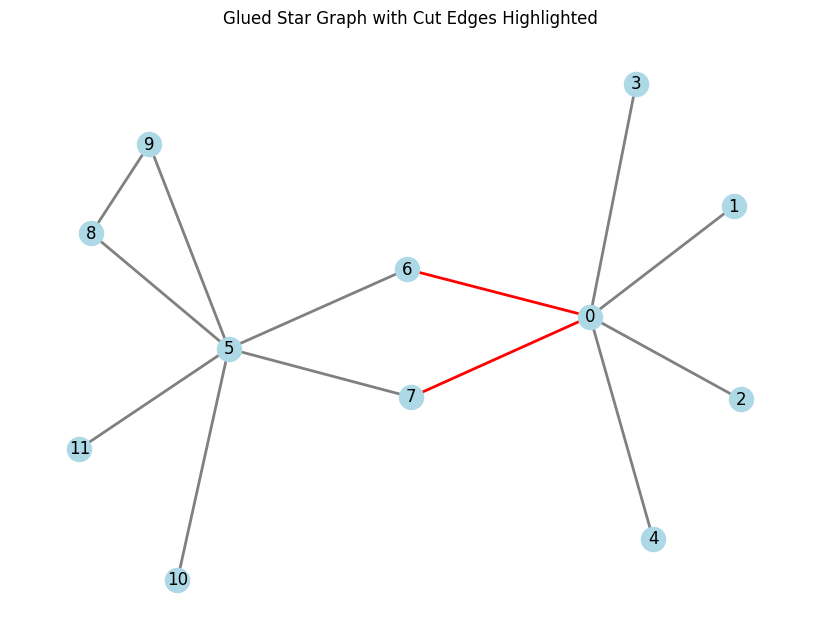

Modularity for separating the graph at the glued edges: 0.3195266272189349


In [24]:
import networkx as nx
from networkx.algorithms.community import modularity
import matplotlib.pyplot as plt

# Parameters
k1 = 4  # Number of leaves in the first star
k2 = 6  # Number of leaves in the second star

# Step 1: Create two star graphs
center_1 = 0
center_2 = k1 + 1
star1 = nx.star_graph(k1)  # Star graph with k1 leaves
star2 = nx.star_graph(k2)  # Star graph with k2 leaves

# Step 2: Relabel the second star to avoid overlapping node IDs
star2 = nx.relabel_nodes(star2, lambda x: x + k1 + 1)


# Step 3: Combine the graphs by adding two edges between the centers
glued_graph = nx.compose(star1, star2)
# glued_graph.remove_edge(center_1, center_2)
glued_edges = [(center_1, center_2+1), (center_1, center_2 + 2)]  # Edges that "glue" the two stars
glued_graph.add_edges_from(glued_edges)
glued_graph.add_edges_from([(center_2+int(k2/2), center_2 + int(k2/2) +1)])  # assymetric edge

# Step 4: Visualize the graph with cut edges in red
pos = nx.spring_layout(glued_graph)  # Position nodes
edge_colors = ['red' if edge in glued_edges or (edge[1], edge[0]) in glued_edges else 'gray' for edge in glued_graph.edges()]

plt.figure(figsize=(8, 6))
nx.draw(
    glued_graph,
    pos,
    with_labels=True,
    node_color='lightblue',
    edge_color=edge_colors,
    width=2,
)
plt.title("Glued Star Graph with Cut Edges Highlighted")
plt.show()

# Step 5: Compute modularity for separating at the glued edges
# Define the two partitions
partition1 = set(star1.nodes())
partition2 = set(star2.nodes())
partitions = [partition1, partition2]

# Compute modularity
modularity_value = modularity(glued_graph, partitions)
print(f"Modularity for separating the graph at the glued edges: {modularity_value}")


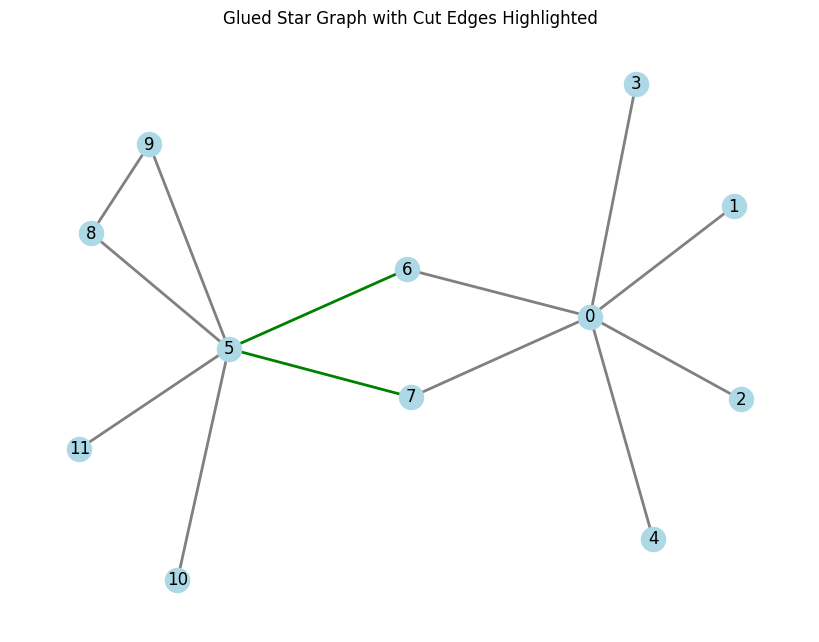

Modularity for separating the graph at the glued edges: 0.34319526627218944


In [31]:
import networkx as nx
from networkx.algorithms.community import modularity
import matplotlib.pyplot as plt

# Parameters
k1 = 4  # Number of leaves in the first star
k2 = 6  # Number of leaves in the second star

# Step 1: Create two star graphs
center_1 = 0
center_2 = k1 + 1
star1 = nx.star_graph(k1)  # Star graph with k1 leaves
star2 = nx.star_graph(k2)  # Star graph with k2 leaves

# Step 2: Relabel the second star to avoid overlapping node IDs
star2 = nx.relabel_nodes(star2, lambda x: x + k1 + 1)


# Step 3: Combine the graphs by adding two edges between the centers
glued_graph = nx.compose(star1, star2)
# glued_graph.remove_edge(center_1, center_2)
glued_edges = [(center_1, center_2+1), (center_1, center_2 + 2)]  # Edges that "glue" the two stars
glued_graph.add_edges_from(glued_edges)


glued_edges = [(center_2, center_2+1), (center_2, center_2 + 2)]  # Edges that "glue" the two stars
glued_graph.add_edges_from(glued_edges)
glued_graph.add_edges_from([(center_2+int(k2/2), center_2 + int(k2/2) +1)])  # assymetric edge

# Step 4: Visualize the graph with cut edges in red
# pos = nx.spring_layout(glued_graph)  # Position nodes
edge_colors = ['green' if edge in glued_edges or (edge[1], edge[0]) in glued_edges else 'gray' for edge in glued_graph.edges()]

plt.figure(figsize=(8, 6))
nx.draw(
    glued_graph,
    pos,
    with_labels=True,
    node_color='lightblue',
    edge_color=edge_colors,
    width=2,
)
plt.title("Glued Star Graph with Cut Edges Highlighted")
plt.show()

# Step 5: Compute modularity for separating at the glued edges
# Define the two partitions
# partition1 = set(star1.nodes())
# partition2 = set(star2.nodes())
partitions = [[5,8,9,10,11], [0,1,2,3,4,6,7]]

# Compute modularity
modularity_value = modularity(glued_graph, partitions)
print(f"Modularity for separating the graph at the glued edges: {modularity_value}")
